In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('Deep_Learning_TF_2_Notebooks_et_Datasets/03-ANNs/kc_house_data.csv')

In [115]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [116]:
df.shape

(21597, 21)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Great we notice that there is no null data !!

In [118]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

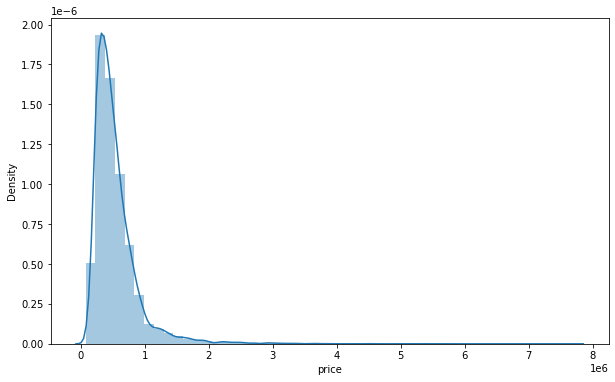

In [119]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

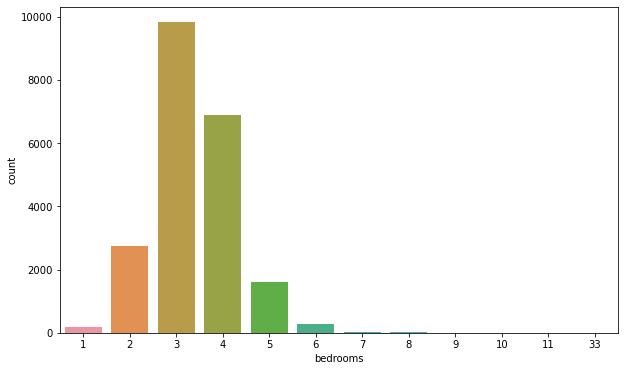

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'])

### Wich Features are coorelated with the target Price

In [121]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

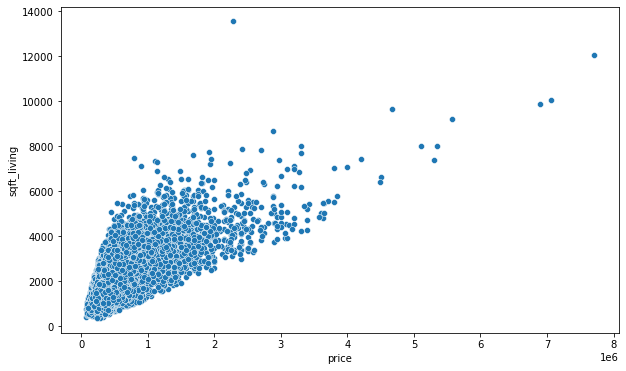

In [122]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

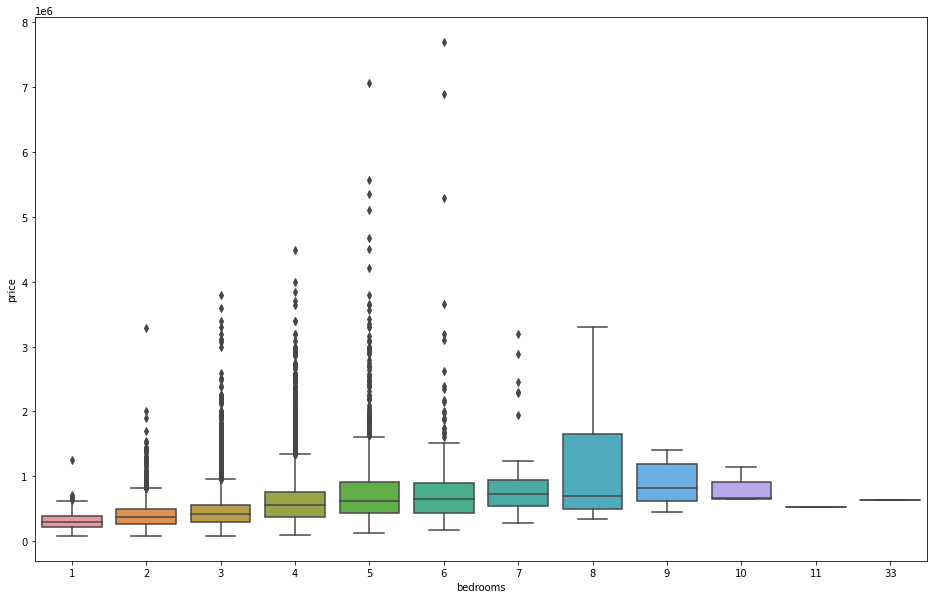

In [123]:
plt.figure(figsize=(16,10))
sns.boxplot(x='bedrooms',y='price',data=df)

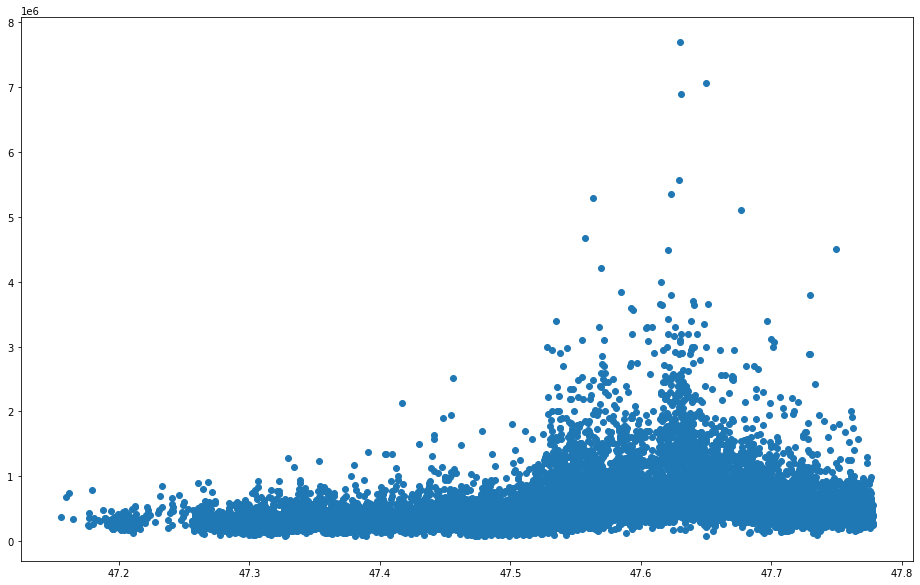

In [124]:
plt.figure(figsize=(16,10))
plt.scatter(x=df['lat'], y=df['price'])
plt.show()

<AxesSubplot:xlabel='price', ylabel='long'>

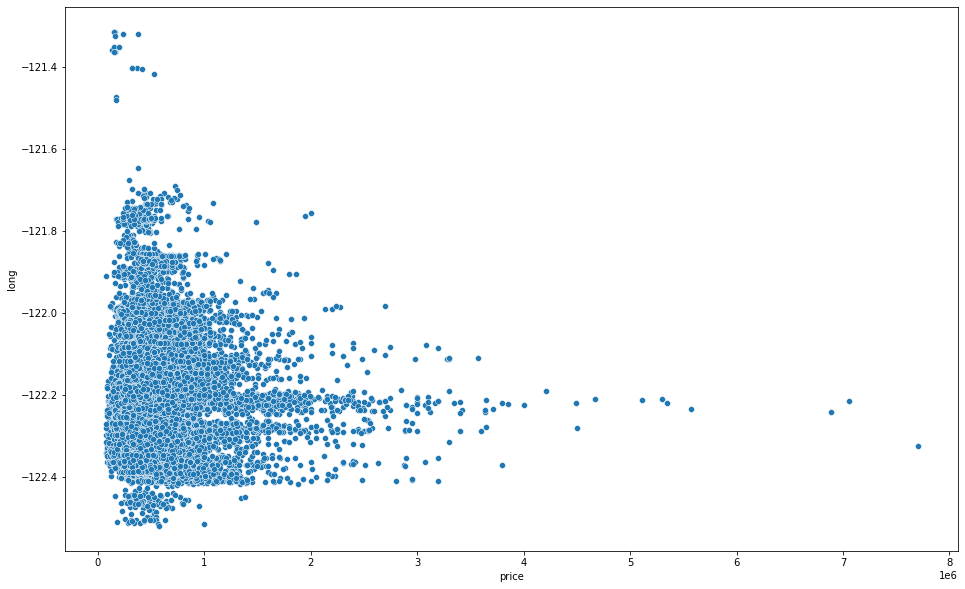

In [125]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

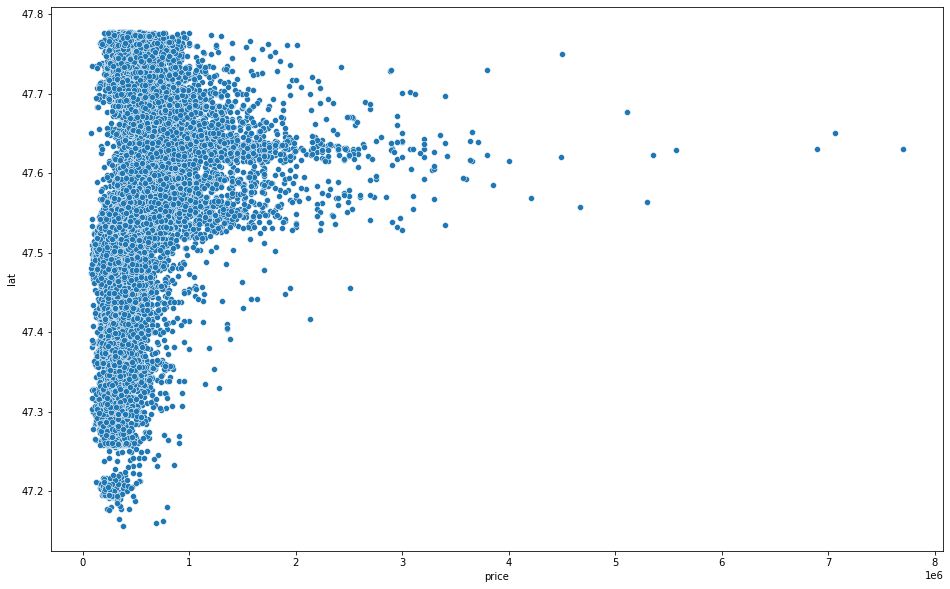

In [126]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

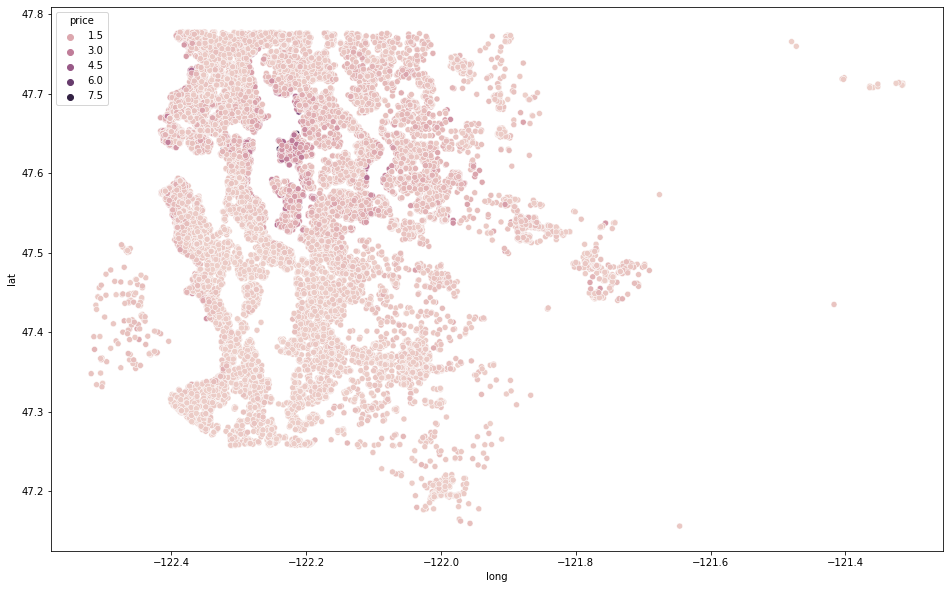

In [127]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [128]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [129]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

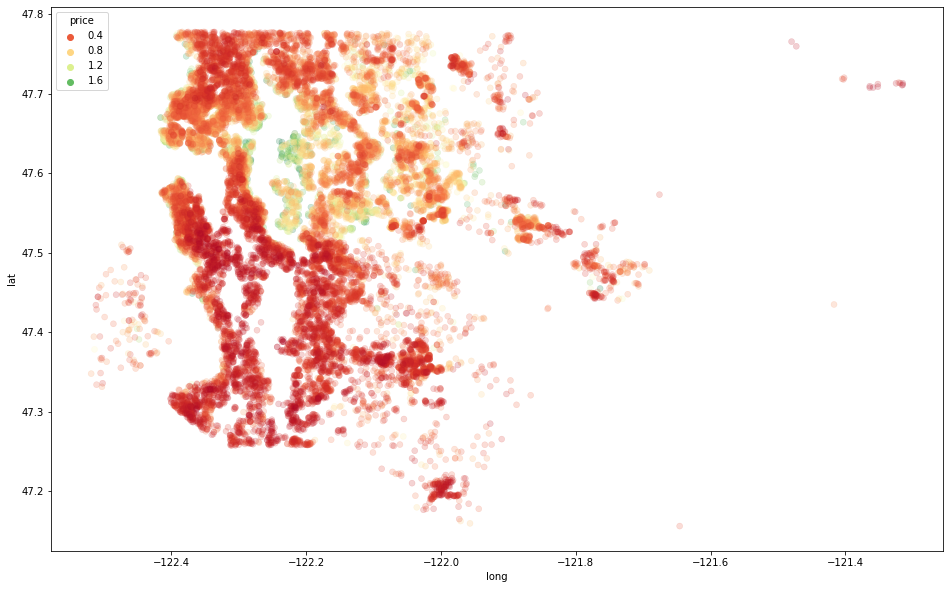

In [130]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

# Feature Engineering

In [131]:
df = df.drop('id',axis=1)

In [132]:
df['date'] = pd.to_datetime(df['date'])

In [133]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [134]:
df['year'] = df['date'].apply(lambda x: x.year)

In [135]:
df['month'] = df['date'].apply(lambda x: x.month)

<AxesSubplot:xlabel='month', ylabel='price'>

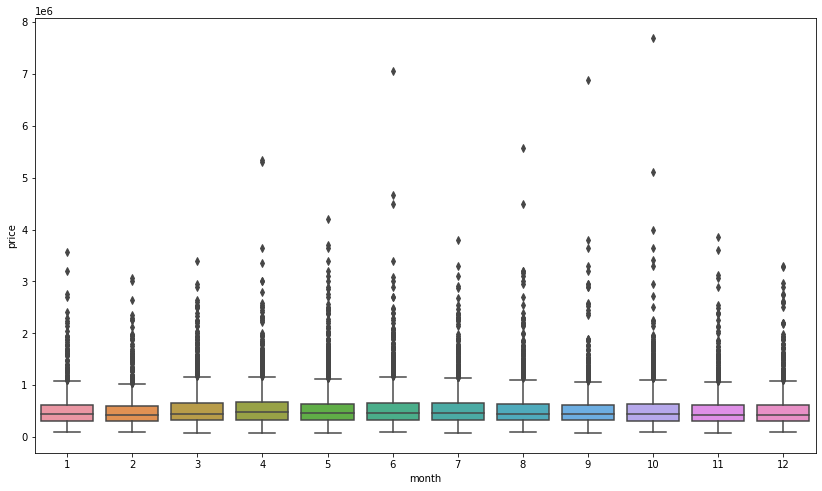

In [136]:
plt.figure(figsize=(14,8))
sns.boxplot(x='month', y='price',data=df)

<AxesSubplot:xlabel='year'>

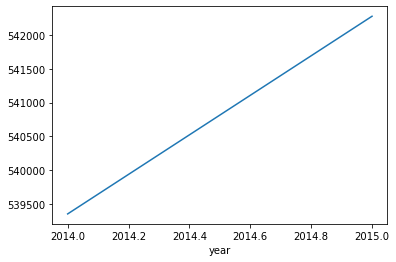

In [137]:
df.groupby('year').mean()['price'].plot()

In [138]:
df = df.drop('date',axis=1)

In [139]:
df = df.drop('zipcode',axis=1)

In [140]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

# Preprocessing

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X = df.drop('price',axis=1).values

In [143]:
y = df['price'].values

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [146]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [148]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [149]:
model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430233714688.0000 - val_loss: 418888515584.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 428814172160.0000 - val_loss: 414285168640.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 409947635712.0000 - val_loss: 374240444416.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 322687664128.0000 - val_loss: 244947337216.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 169211592704.0000 - val_loss: 115001819136.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 101830680576.0000 - val_loss: 95934324736.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 97554300928.0000 - val_loss: 94397046784.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 95891955712.0000 - val_loss: 93017759744.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 1ms/step - loss: 38377213952.0000 - val_loss: 43048488960.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 38249885696.0000 - val_loss: 42409611264.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 38119862272.0000 - val_loss: 42044592128.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 37968113664.0000 - val_loss: 43852759040.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 37882572800.0000 - val_loss: 42357346304.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 37725097984.0000 - val_loss: 42022789120.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 37587636224.0000 - val_loss: 41883287552.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 37461880832.0000 - val_loss: 42168520704.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 33128800256.0000 - val_loss: 35089768448.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 33077041152.0000 - val_loss: 35728101376.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 33040046080.0000 - val_loss: 34916057088.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 33013762048.0000 - val_loss: 35784658944.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 33002113024.0000 - val_loss: 34975547392.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32914966528.0000 - val_loss: 35034927104.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 32871897088.0000 - val_loss: 36127334400.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 32888545280.0000 - val_loss: 34669445120.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31501232128.0000 - val_loss: 33733644288.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 31497443328.0000 - val_loss: 35012075520.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 31450202112.0000 - val_loss: 34891239424.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 31449321472.0000 - val_loss: 34733010944.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 31464024064.0000 - val_loss: 34426056704.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31400300544.0000 - val_loss: 34040315904.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 31423633408.0000 - val_loss: 35238526976.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 31415867392.0000 - val_loss: 33313249280.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30648274944.0000 - val_loss: 34016704512.0000
Epoch 268/400
119/119 [==============================] - 0s 4ms/step - loss: 30653257728.0000 - val_loss: 33993568256.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30657787904.0000 - val_loss: 34565586944.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30572781568.0000 - val_loss: 33368098816.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30586677248.0000 - val_loss: 34541621248.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30578784256.0000 - val_loss: 33264896000.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 30608392192.0000 - val_loss: 33096261632.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30564644864.0000 - val_loss: 33766371328.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30069147648.0000 - val_loss: 32885276672.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 29989799936.0000 - val_loss: 34228541440.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 29919911936.0000 - val_loss: 36095664128.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 29929777152.0000 - val_loss: 33635659776.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 29938898944.0000 - val_loss: 34694725632.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 29940469760.0000 - val_loss: 34445258752.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 29914658816.0000 - val_loss: 34794233856.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 29887176704.0000 - val_loss: 33371088896.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29366446080.0000 - val_loss: 34444845056.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29351757824.0000 - val_loss: 34078531584.0000


In [150]:
hystory = pd.DataFrame(model.history.history)

In [151]:
hystory

,loss,val_loss
0,4.302337e+11,4.188885e+11
1,4.288142e+11,4.142852e+11
2,4.099476e+11,3.742404e+11
3,3.226877e+11,2.449473e+11
4,1.692116e+11,1.150018e+11
...,...,...
395,2.942517e+10,3.523078e+10
396,2.940508e+10,3.400285e+10
397,2.935391e+10,3.468052e+10
398,2.936645e+10,3.444485e+10


<AxesSubplot:>

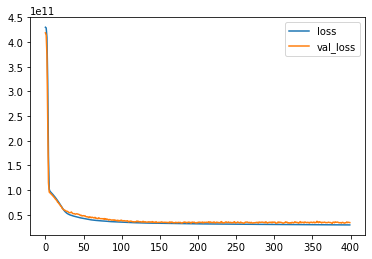

In [152]:
hystory.plot()

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [154]:
predictions = model.predict(X_test)

In [155]:
predictions

array([[353259.44],
       [534160.5 ],
       [478295.78],
       ...,
       [327910.8 ],
       [499769.72],
       [585372.94]], dtype=float32)

In [156]:
np.sqrt(mean_squared_error(y_test,predictions))

184603.70000730042

In [157]:
mean_absolute_error(y_test,predictions)

113075.68378314759

In [158]:
explained_variance_score(y_test,predictions)

0.7831348672952356

[]

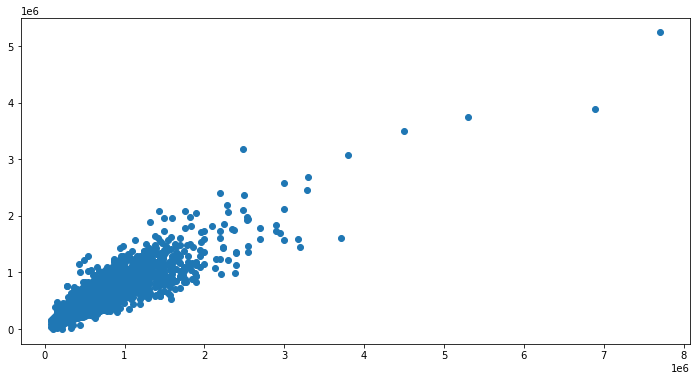

In [159]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot()

In [160]:
new_house = df.drop('price',axis=1).iloc[0]
scaler.transform(new_house.values.reshape(-1,19))

array([[0.0625    , 0.06666667, 0.05792683, 0.00516884, 0.        ,
        0.        , 0.        , 0.5       , 0.33333333, 0.08453838,
        0.        , 0.47826087, 0.        , 0.56720299, 0.215     ,
        0.13926499, 0.00574235, 0.        , 0.81818182]])